In [196]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load train and test datasets

In [187]:
train = pd.read_csv('train.csv')
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,...,Order_Month,Geo_Distance,Delivery_person_ID,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,Time_taken (min)
0,-1.664388,-1.075718,-0.552550,0.325919,-0.591127,0.328086,0.752202,0.733763,-1.222673,0.441859,...,1.872152,-0.030161,-1.401182,-0.288060,-0.785710,-0.456111,-0.423764,-0.14221,-0.537223,35
1,0.245661,-0.114675,-0.541341,0.451117,-0.588938,0.449982,-0.578254,-0.503836,-1.222673,0.441859,...,0.032721,-0.067302,-1.169474,0.881438,1.349140,1.333781,-0.423764,-0.14221,-0.537223,21
2,-0.969825,-1.075718,-0.941433,0.263364,-1.011252,0.260819,-2.130452,-1.947701,-1.222673,-1.321359,...,-1.806710,-0.083190,0.124892,-0.288060,0.281715,-1.351057,-0.423764,-0.14221,-0.537223,15
3,-0.101621,1.166717,-2.241560,-3.332385,-2.366245,-3.333457,-1.021739,-0.710102,-1.222673,0.441859,...,1.872152,-0.067031,1.363330,0.296689,-1.853135,-0.456111,-0.423764,-0.14221,-0.537223,29
4,-0.101621,0.205673,-2.241560,-3.332385,-2.360801,-3.331572,-0.134768,-0.091303,1.223648,0.441859,...,-1.806710,-0.045539,-0.871184,0.881438,1.349140,-0.456111,-2.116118,-0.14221,1.871657,19


In [188]:
test = pd.read_csv('test.csv')
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]
test.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,...,Order_Month,Geo_Distance,Delivery_person_ID,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,Time_taken (min)
0,0.940224,-0.435023,0.172238,0.151024,0.161079,0.151308,0.973944,0.940030,0.000488,-1.321359,...,0.032721,-0.051860,0.867955,0.296689,0.281715,-0.456111,-0.423764,-0.14221,1.871657,21
1,0.766584,1.166717,0.689756,0.832858,0.699339,0.832188,0.752202,0.733763,1.223648,-1.321359,...,-1.806710,-0.062644,0.383233,0.881438,-0.785710,1.333781,-2.116118,-0.14221,-0.537223,17
2,-0.101621,-0.435023,0.662932,0.116606,0.665854,0.114062,-1.465224,-1.328902,0.000488,-1.321359,...,1.872152,-0.083343,1.427249,-0.288060,-1.853135,-0.456111,1.268591,-0.14221,-0.537223,24
3,0.766584,0.846369,-0.808501,0.294976,-0.872293,0.292429,-1.686966,-1.535168,1.223648,0.441859,...,0.032721,-0.083198,-0.937767,1.466187,0.281715,1.333781,1.268591,-0.14221,-0.537223,29
4,-0.275261,0.526021,1.262129,0.239884,1.305830,0.242052,0.530459,0.527497,0.000488,0.441859,...,0.032721,-0.032481,-0.186715,0.296689,-0.785710,-1.351057,-0.423764,-0.14221,-0.537223,28


# Analysis of Train data

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


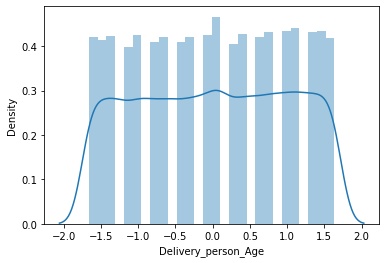

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


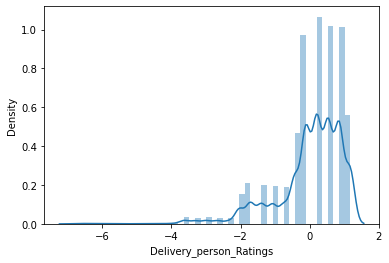

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


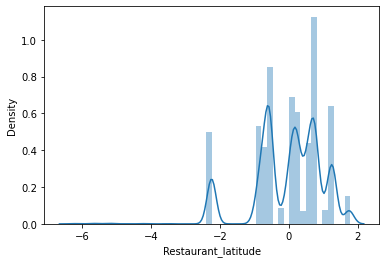

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


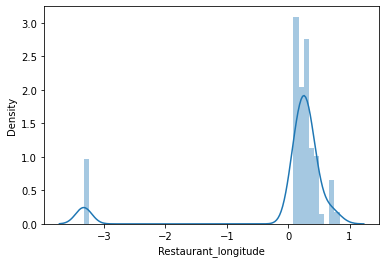

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


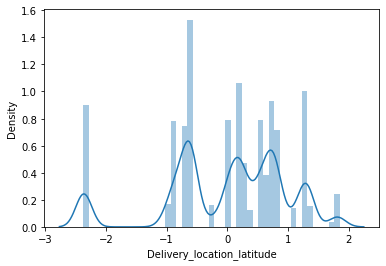

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


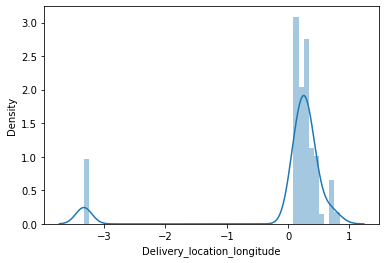

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


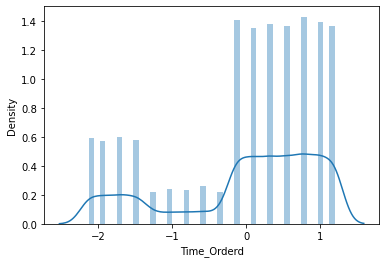

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


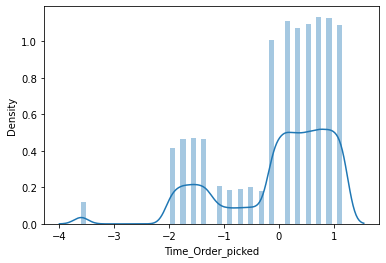

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


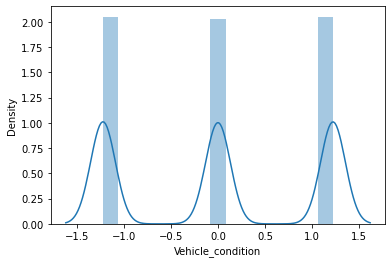

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


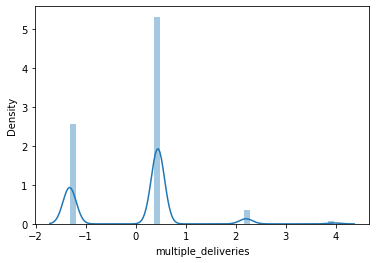

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


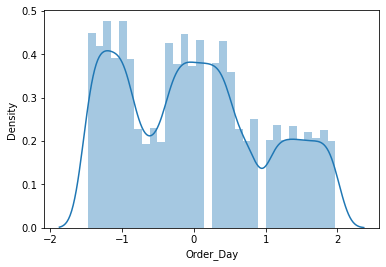

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


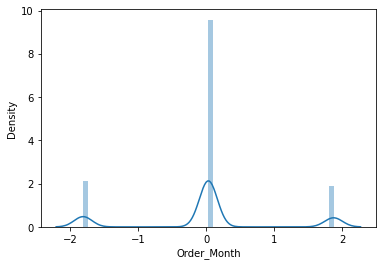

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


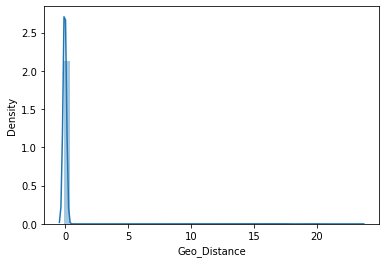

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


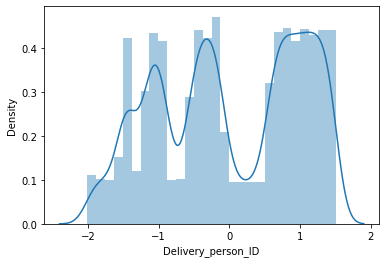

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


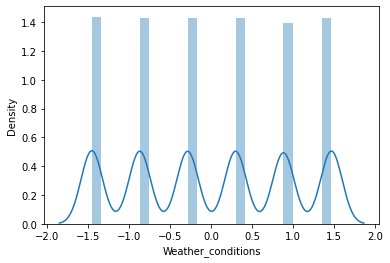

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


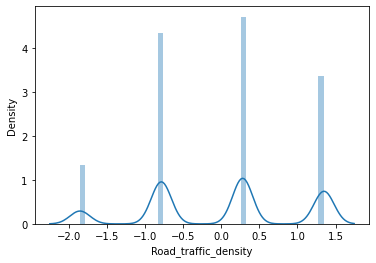

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


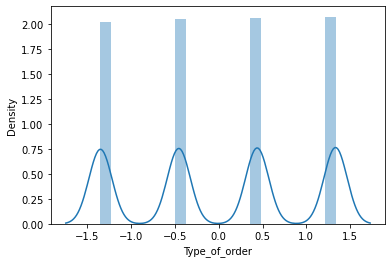

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


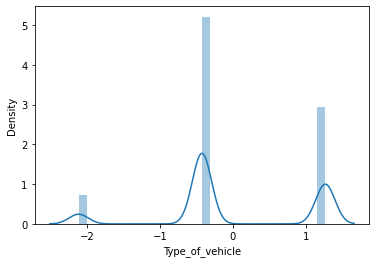

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


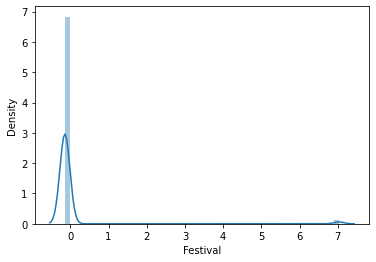

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


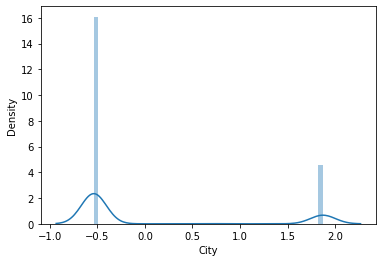

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


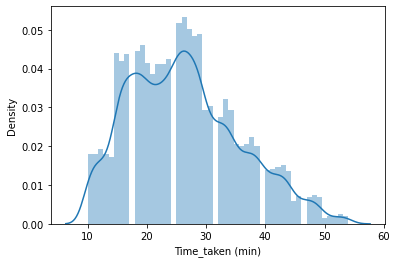

In [189]:
for i in train.columns:
    sns.distplot(train[i], kde=True)
    plt.show()

In [190]:
# sns.pairplot(train)
# plt.show()

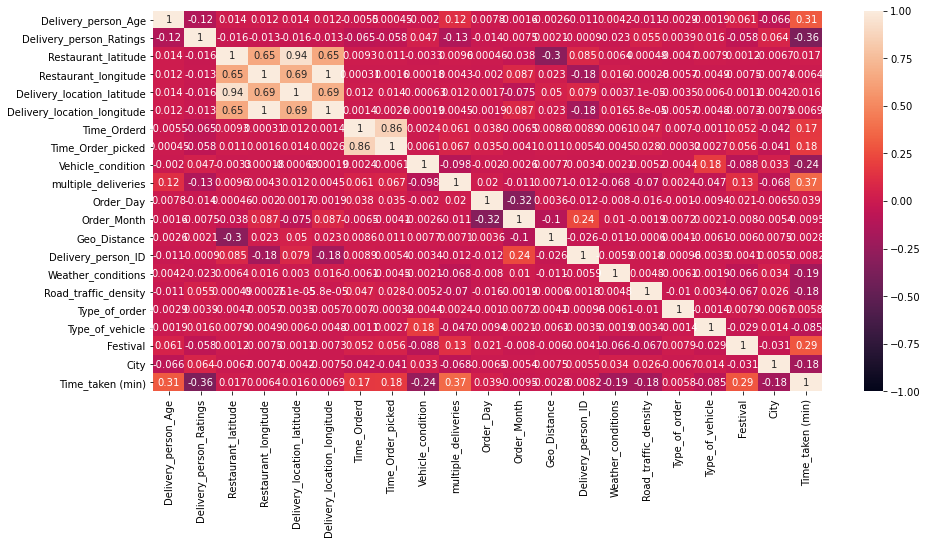

In [191]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(), vmax=1, vmin=-1, annot = True)
plt.show()

# Model Building

In [192]:
def model_report(model, xtrain, xtest, ytrain, ytest):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)

    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    r2s = r2_score(ytest,ypred)

    return mae, mse, r2s

In [193]:
models = {'LinearRegression':LinearRegression(),
          'Ridge':Ridge(),
          'Lasso':Lasso(),
          'ElasticNet':ElasticNet()}

for model_name, model in models.items():
    print(model_name.upper())
    mae, mse, r2s = model_report(model, X_train, X_test, y_train, y_test)
    print("MAE:\t",mae)
    print("MSE:\t",mse)
    print()
    print("R2 :\t",round(r2s*100,2),'%')
    print('\n')

LINEARREGRESSION
MAE:	 5.296392172507088
MSE:	 43.26952002060189

R2 :	 51.57 %


RIDGE
MAE:	 5.572469596408847
MSE:	 47.74834002283775

R2 :	 46.56 %


LASSO
MAE:	 6.020383872438926
MSE:	 55.50350311630178

R2 :	 37.88 %


ELASTICNET
MAE:	 6.029795607980323
MSE:	 55.277071852694846

R2 :	 38.13 %




# Linear Regression

In [197]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

X_train_const = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_const)

# Fit the statsmodels model to training data
sm_results = sm_model.fit()

print(sm_results.summary())

                            OLS Regression Results                            
Dep. Variable:       Time_taken (min)   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     1261.
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        05:39:59   Log-Likelihood:                -82911.
No. Observations:               25072   AIC:                         1.659e+05
Df Residuals:                   25051   BIC:                         1.660e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             